## Functional preference profiles

For each region in the clustering analysis, we're going to determine how well we can classify studies that activated the region, versus those that did not, on the basis of semantic topics that describe the psychological states in each study. 

Using the RegionalClassifier class included in this repo, we can perform this analysis on any given clustering image. I've also included some functons to easily make polar plots to visualize which topics were most strongly associated with any given region

### Classification

In [1]:
%matplotlib inline
from neurosynth.base.dataset import Dataset
dataset = Dataset.load("data/neurosynth_0.6_400_4.pkl")
from sklearn.naive_bayes import GaussianNB
from classification import RegionalClassifier
from plotting import plot_clf_polar
from sklearn.metrics import roc_auc_score
from nilearn import plotting as niplt
import seaborn as sns
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

We used Gaussian naive Bayes for classificaiton, and extract log odds ratios for each topic for each region to estimate how strongly each psychological state indicated that a given region was active.


In [2]:
# Instantiate a RegionalClassifier for your image and classify
wclf60 = RegionalClassifier(dataset, 'images/wATL/whole60_k4.nii', GaussianNB())
wclf60.classify(scoring=roc_auc_score)

Classifying...


/mnt/c/Users/user/neurosynth-lfc-master/venv/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/mnt/c/Users/user/neurosynth-lfc-master/venv/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/mnt/c/Users/user/neurosynth-lfc-master/venv/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1

[##########] 100%


/mnt/c/Users/user/neurosynth-lfc-master/venv/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/mnt/c/Users/user/neurosynth-lfc-master/venv/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/mnt/c/Users/user/neurosynth-lfc-master/venv/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1

In [3]:
wclf60.class_score

array([ 0.61315421,  0.58845043,  0.63749027,  0.56469709])

We can take a look at various aspects of the classification performance such as the classification performance for each region (in this case ROC area under the curve):

### Visualization with polar plots

#### Note that I ended up using wordclouds in r for visulaization in the manuscript. I presented the feature words (instead of a topic name I assigned) based on their LOR values and the permutation results.

The original thought, following de la Vega (2016, 2018) was plotted below. I separated the dorsal and ventral clusters and plotted them based on their most associated topics.

We've included a listing of the topics used in the manuscript, and a set of "nicknames" that we used throughout the manuscript for each topic. This bit of code extracts the nickname (i.e. topic_name) I gave to each topic to help with visualization. You may also use "top_2" to label each topic with the two strongest loading words.

In [4]:
word_keys = pd.read_csv("data/v4-topics-400.txt", delimiter='\t')
word_keys['top_2'] = word_keys['top_words'].apply(lambda x: x.split(' ')[0] + ' ' + x.split(' ')[1])
word_keys['topic_name'] = word_keys.apply(lambda row: '_'.join([str(row.topic_number)] + row.top_words.split(' ')[0:3]), axis=1)
feature_names2 = pd.merge(pd.DataFrame(wclf60.feature_names, columns=['topic_name']), word_keys)['nickname'].tolist()


To recreate the plots from the publication, we simply extract a pandas formatted table of importances that represent how strongly each topic indicated each region would be active in a study (in this case log odds ratios) using `clf.get_formatted_importances`, ensuring to provide the topic nicknames from above. 

Then, we feed this pandas table into plot_clf_polar, which returns a nice polar plot each each prespecified topic.

In [6]:
from plotting import plot_clf_polar

In [7]:
selected_labels = ['DMN', 'phonological', 'recognition', 'face', 'language', 'visuoauditory modality', 'empathy', 'semantics','picture', 'sentence', 'verbal fluency', 'voice identity', 'ToM', 'events', 'comprehension', 'valence', 'speech', 'memory encoding', 'music', 'mentalization', 'abstract concrete', 'auditory', 'memory retrieval', 'olfactory', 'recollection', 'gesture communication', 'social cognition']

dorsal_labels = ['phonological', 'language', 'visuoauditory modality', 'empathy', 'semantics', 'sentence', 'verbal fluency', 'voice identity', 'comprehension', 'speech', 'music', 'auditory']

ventral_labels = ['DMN', 'phonological', 'recognition', 'face', 'language', 'visuoauditory modality', 'empathy', 'semantics', 'picture', 'sentence', 'verbal fluency', 'voice identity', 'ToM', 'events', 'comprehension', 'valence', 'speech', 'memory encoding', 'music', 'mentalization', 'abstract concrete', 'auditory', 'memory retrieval', 'olfactory', 'recollection', 'gesture communication', 'social cognition']

### Functional profiles for the whole ATL (K =4)

Ventral (red)
dorsal_inf (green)
Para (orange)
dorsal_sup (grey)


In [9]:
dorsal = [2,4]
ventral = [1,3]

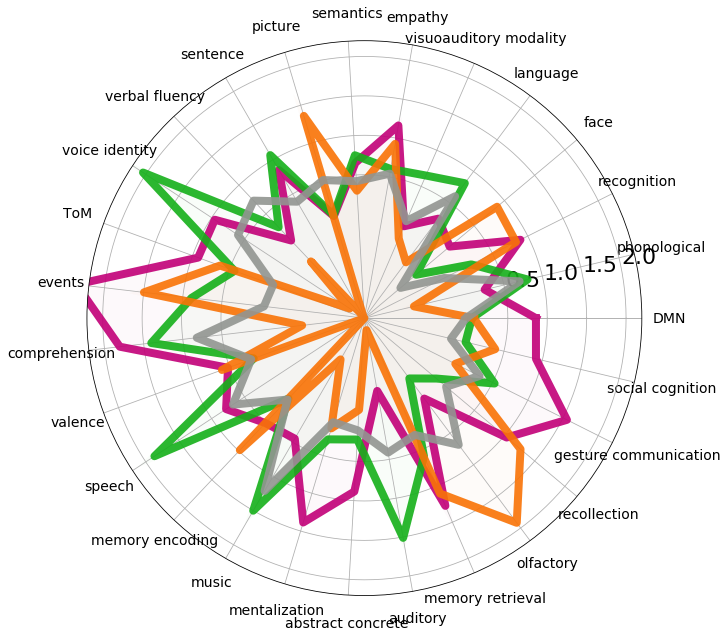

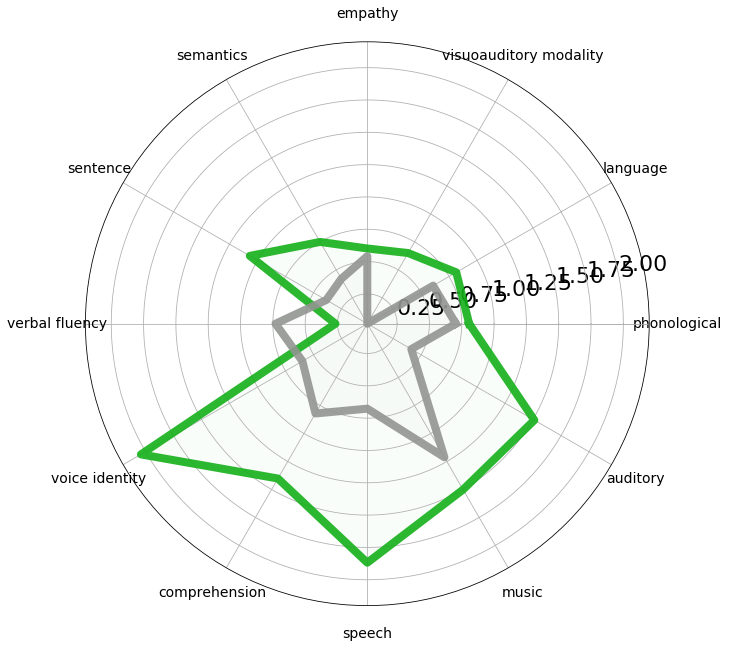

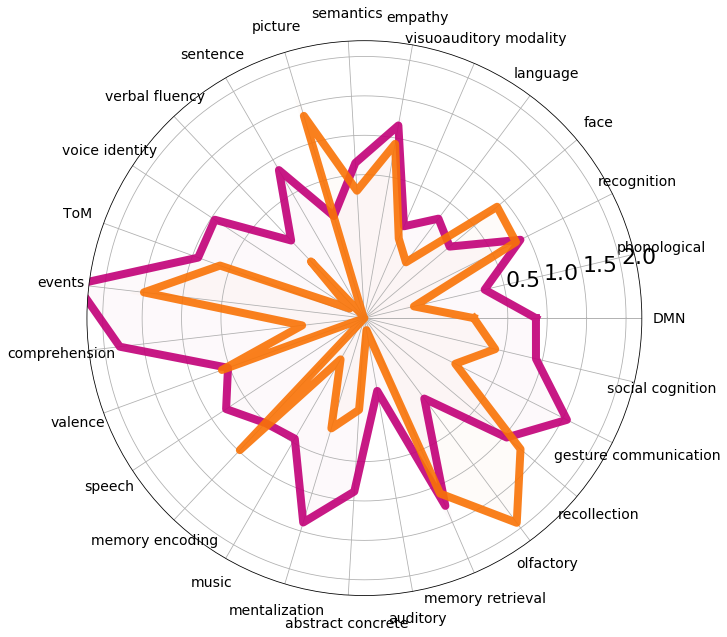

In [10]:
formated_importances = wclf60.get_formatted_importances(feature_names=feature_names2)

colors = ['magenta', 'green', 'orange', 'grey']
colors = sns.xkcd_palette(colors)

sem = plot_clf_polar(formated_importances,labels = selected_labels, palette = colors,label_size=14, max_val=2.2)
dorsal = plot_clf_polar(formated_importances,labels = dorsal_labels, mask = dorsal, palette = colors,label_size=14, max_val=2.2)
ventral = plot_clf_polar(formated_importances,labels = ventral_labels, mask = ventral, palette = colors,label_size=14, max_val=2.2)

Alternatively, asking plot_clf_polar to choose some topics for us. In this case, we're asking for the 6 topics that load most strongly for each region, and specifiying that these topics are reordered to ensure a nice looking visualization. Under the hood, this function uses hierarchical clustering to reorder the topics. See the docstring of plot_polar for many more ways to choose topics and automatically order the features.

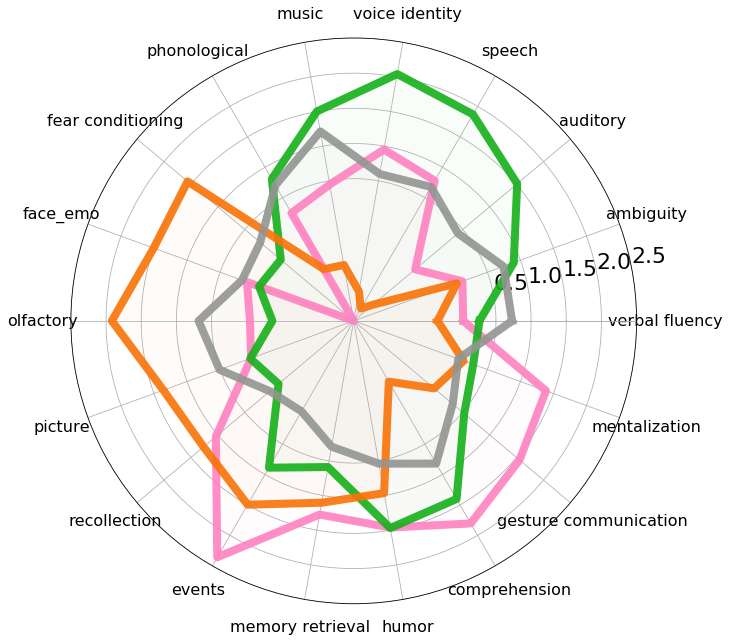

In [11]:
colors = ['pink',"green",'orange', "grey"]
colors = sns.xkcd_palette(colors)

topics =plot_clf_polar(wclf60.get_formatted_importances(feature_names=feature_names2), n_top=6, reorder=True, max_val=2.5, label_size=16, palette = colors)

plot_clf_polar also returns the topics it selected as a list, and the data that went into the visualization (for debugging)

In [12]:
topics

(['verbal fluency',
  'ambiguity',
  'auditory',
  'speech',
  'voice identity',
  'music',
  'phonological',
  'fear conditioning',
  'face_emo',
  'olfactory',
  'picture',
  'recollection',
  'events',
  'memory retrieval',
  'humor',
  'comprehension',
  'gesture communication',
  'mentalization'],
 region                        1         2         3         4
 feature                                                      
 verbal fluency         0.034484  0.265848 -0.330537  0.729327
 ambiguity              0.121575  0.898990  0.037292  0.744134
 auditory              -0.381749  1.511362 -1.164753  0.412593
 speech                 0.779967  1.868153 -1.319389  0.676713
 voice identity         0.951728  2.041383 -1.096714  0.598984
 music                  0.446160  1.501197 -0.715279  1.212236
 phonological           0.248620  0.807382 -0.673291  0.704344
 fear conditioning     -1.522135 -0.167692  1.562245  0.213589
 face_emo               0.093677 -0.089874  1.504895  0.168890
 ol

# Estimate uncertainty

## Permutation tests


First, using permute_log_odds_ratio we perform a permutation test for each region - topic log odds ratio, resulting in the z-score and p-value of the observed log odds ratio in permuted null distribution. Small p-values indicate it is inprobably we would observe the given log odds ratio under the null distribution.
Note that this function takes a fitted RegionalClassifier model (that we generated above) and the number of times to resample as required arguments

In [13]:
%load_ext autoreload
%autoreload 1
%aimport classification

In [14]:
# These are the names of each region in the left ATL
whole_ATL = ['ventral', 'dorsal-inf','para', 'dorsal-sup']

In [15]:
from classification import permute_log_odds
lor_z = classification.permute_log_odds(wclf60, 1000, feature_names=None, region_names = whole_ATL)

[##########] 100%


In [16]:
print(lor_z)

             ROI                                variable     lor_z  \
0        ventral             0_patients_controls_healthy -0.199444   
1     dorsal-inf             0_patients_controls_healthy -0.251212   
2           para             0_patients_controls_healthy  1.641391   
3     dorsal-sup             0_patients_controls_healthy  0.548648   
4        ventral            100_smokers_smoking_nicotine -4.085735   
5     dorsal-inf            100_smokers_smoking_nicotine -2.420564   
6           para            100_smokers_smoking_nicotine  1.824709   
7     dorsal-sup            100_smokers_smoking_nicotine -4.627192   
8        ventral            101_personality_traits_trait -0.460939   
9     dorsal-inf            101_personality_traits_trait -1.653947   
10          para            101_personality_traits_trait  0.457451   
11    dorsal-sup            101_personality_traits_trait  1.916151   
12       ventral       102_updating_tracking_information -1.322910   
13    dorsal-inf    

Next, we must adjust the p-values for multiple comparisons. To do so, we will use False Discovery Rate.

Finally, we use multipletests from the stats models package to correct our p-values given an alpha of 0.01. We then consider the null hypothesis rejected if the adjusted p-value is less than 0.05 and the sign is positive (excluding less easily interpreted negative associations).

In [17]:
lor_z_all = lor_z

from statsmodels.sandbox.stats.multicomp import multipletests

reject, p_corr, a, a1 = multipletests(lor_z_all.p, alpha=0.01, method='fdr_tsbky')

lor_z_all['p_corr_01'] = p_corr # Adjusted p-value
lor_z_all['reject_01'] = (lor_z_all.p_corr_01<0.05) & (lor_z_all.lor_z > 0) # Was the null hypothesis rejected?

The resulting table includes the FDR corrected p-value for each region/topic combination, and if the null hypothesis has been rejected.

In [18]:
lor_z_all.head()

,ROI,variable,lor_z,p,p_corr_01,reject_01
0,ventral,0_patients_controls_healthy,-0.199444,0.841916,0.866549,False
1,dorsal-inf,0_patients_controls_healthy,-0.251212,0.801651,0.847329,False
2,para,0_patients_controls_healthy,1.641391,0.100716,0.277070,False
3,dorsal-sup,0_patients_controls_healthy,0.548648,0.583247,0.732757,False
4,ventral,100_smokers_smoking_nicotine,-4.085735,0.000044,0.001059,False


## Bootstrapped log odds ratios
Finally, another form of determining the uncertainty in our observations is to calculate bootstrapped confidence intervals for our estimates of the log odds ratio for each topic for each region.

We can do so using the function bootstrap_log_odds.

In [20]:
%load_ext autoreload
%autoreload 1
%aimport classification

whole_ATL = ['ventral', 'dorsal-inf','para', 'dorsal-sup']

lor_ci = classification.bootstrap_log_odds(wclf60, 100, feature_names=None, region_names = whole_ATL, n_jobs=7)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[##########] 100%


In [21]:
lor_ci.head()

,region,topic_name,hi_ci,low_ci,mean
0,dorsal-inf,0_patients_controls_healthy,0.161677,-0.257687,-0.046320
1,dorsal-inf,100_smokers_smoking_nicotine,0.006786,-1.983715,-0.660303
2,dorsal-inf,101_personality_traits_trait,0.249800,-1.100998,-0.450869
3,dorsal-inf,102_updating_tracking_information,0.353783,-0.677963,-0.041971
4,dorsal-inf,103_perception_discrimination_physical,0.515927,-0.128254,0.203331
